In [91]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
import numpy as np
from sklearn.metrics import accuracy_score
import xgboost as xgb
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [50]:
d1 = pd.read_csv('ks-projects-201612.csv', encoding='cp1251')
d2 = pd.read_csv('ks-projects-201801.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ID: internal kickstarter id
name: name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
category: category
main_category: category of campaign
currency: currency used to support
deadline: deadline for crowdfunding
goal fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.
launched: date launched
pledged: amount pledged by "crowd"
state: Current condition the project is in
backers: number of backers
country: country pledged from
usd pledged: amount of money pledged
usd_pledged_real: Pledged amount in USD (conversion made by fixer.io api)
usd_goal_real: Goal amount in USD


Синтетические данные:
1. Продолжительность сбора
2. Валюта, приведённая к доллару
3. Вклад одного бейкера
4. Мешок слов для названия
5. Количество прописных букв - count_A
6. Количество слов - word_count

In [56]:
def uppercase_count(x):
    return len(re.findall(r'[A-Z]', x))

def word_count(x):
    return len(re.findall(r' ', x)) + 1

d3 = d2[['usd_goal_real']].copy(deep=True)
d3['word_count'] = d2['name'].transform(lambda x: word_count(str(x)))
d3['uppercase_count'] = d2['name'].transform(lambda x: uppercase_count(str(x)))
d3

,usd_goal_real,word_count,uppercase_count
0,1533.95,6,4
1,30000.00,8,12
2,45000.00,3,2
3,5000.00,7,7
4,19500.00,8,7
...,...,...,...
378656,50000.00,6,6
378657,1500.00,2,2
378658,15000.00,11,5
378659,15000.00,3,4


In [57]:
arr = ['category', 'main_category', 'currency', 'state', 'country']
for i in arr:
    le = LabelEncoder()
    d3[i] = le.fit_transform(d2[i])

In [59]:
d3['name'] = d2['name'].apply(lambda x: len(str(x)))

In [61]:
d2['deadline'] = pd.to_datetime(d2['deadline'])
d2['launched'] = pd.to_datetime(d2['launched'])

In [62]:
type(d2['deadline'].iloc[0])
d2['newdatetime'] = abs(d2['deadline'] - d2['launched'])

In [63]:
type(d2['newdatetime'].iloc[0])
d3['duration'] = d2['newdatetime'].apply(lambda x: x.days)

In [10]:
d2.drop(columns=['deadline', 'launched', 'newdatetime'], inplace=True)
#d2.drop(columns=['ID', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], inplace=True)
d2.drop(columns=['pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'], inplace=True)

In [65]:
d3

,usd_goal_real,word_count,uppercase_count,category,main_category,currency,state,country,name,duration
0,1533.95,6,4,108,12,5,1,9,31,58
1,30000.00,8,12,93,6,13,1,22,45,59
2,45000.00,3,2,93,6,13,1,22,14,44
3,5000.00,7,7,90,10,13,1,22,49,29
4,19500.00,8,7,55,6,13,0,22,58,55
...,...,...,...,...,...,...,...,...,...,...
378656,50000.00,6,6,39,6,13,0,22,49,29
378657,1500.00,2,2,93,6,13,1,22,9,26
378658,15000.00,11,5,93,6,13,1,22,71,45
378659,15000.00,3,4,138,13,13,1,22,24,30


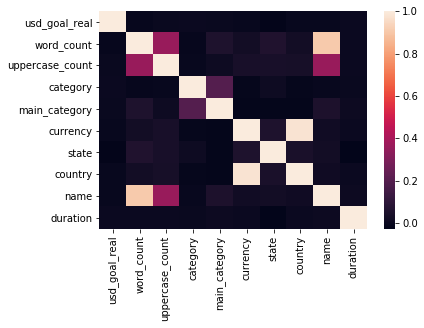

In [66]:
sns.heatmap(d3.corr())

In [81]:
y = d3['state']
X = d3.drop(columns=['state'])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
mod = xgb.XGBClassifier(n_jobs=-1)
mod.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [87]:
LogRes = LogisticRegression(random_state=0)
LogRes.fit(X_train, y_train)
ylr_pred = LogRes.predict(X_test)
ylr_pred

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([3, 1, 1, ..., 3, 3, 1])

In [89]:
accuracy_lr = accuracy_score(y_test, ylr_pred)
print("Accuracy for Logistic Regression: %.2f%%" % (accuracy_lr * 100.0))

Accuracy for Logistic Regression: 54.39%


In [92]:
per = Perceptron(random_state=101)
per.fit(X_train, y_train)
yper_pred = per.predict(X_test)
accuracy_per = accuracy_score(y_test, yper_pred)
print("Accuracy for Perceptron: %.2f%%" % (accuracy_per * 100.0))

Accuracy for Perceptron: 39.81%


In [85]:
y_pred = mod.predict(X_test)
#predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.29%


Без нормализации Accuracy: 60.29%


In [76]:
scaler = StandardScaler()
X[['usd_goal_real']] = scaler.fit_transform(X[['usd_goal_real']])

In [83]:
X

,usd_goal_real,word_count,uppercase_count,category,main_category,currency,country,name,duration
0,-0.038094,0.107251,-0.333803,0.603794,1.149121,-1.521145,-1.570995,-0.240707,0.372011
1,-0.013404,0.827225,1.257605,0.271263,-0.387483,0.506853,0.502239,0.638042,0.387183
2,-0.000394,-0.972710,-0.731655,0.271263,-0.387483,0.506853,0.502239,-1.307760,0.159597
3,-0.035088,0.467238,0.262975,0.204757,0.636920,0.506853,0.502239,0.889114,-0.067989
4,-0.022511,0.827225,0.262975,-0.571149,-0.387483,0.506853,0.502239,1.454024,0.326493
...,...,...,...,...,...,...,...,...,...
378656,0.003943,0.107251,0.064049,-0.925849,-0.387483,0.506853,0.502239,0.889114,-0.067989
378657,-0.038123,-1.332697,-0.731655,0.271263,-0.387483,0.506853,0.502239,-1.621599,-0.113507
378658,-0.026414,1.907186,-0.134877,0.271263,-0.387483,0.506853,0.502239,2.270005,0.174769
378659,-0.026414,-0.972710,-0.333803,1.268856,1.405222,0.506853,0.502239,-0.680082,-0.052817


In [82]:
arr = ['usd_goal_real', 'word_count', 'uppercase_count', 'category', 'main_category', 'currency', 'name', 'duration', 'country']
for i in arr:
    scaler = StandardScaler()
    X[[i]] = scaler.fit_transform(X[[i]])
